## Predicting energy output of a power plant

### Import the power.csv

The dataset is obtained from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant)


In [1]:
import numpy
filename = "power.csv"
raw_data = open(filename, 'rt')
data = numpy.loadtxt(raw_data, delimiter=",")

### AT,EV,AP,RH,PE

The dataset contains five columns, namely, Ambient Temperature (AT),Exhaust Vacuum (EV), Ambient Pressure (AP), Relative Humidity (RH), and net hourly electrical energy output (PE) of the plant. The first four are the attributes, and are used to predict the output, PE

In [2]:
# We check the size of the data
data.shape

(9568, 5)

In [3]:
# We check the first 10 rows
data[:10]

array([[  14.96,   41.76, 1024.07,   73.17,  463.26],
       [  25.18,   62.96, 1020.04,   59.08,  444.37],
       [   5.11,   39.4 , 1012.16,   92.14,  488.56],
       [  20.86,   57.32, 1010.24,   76.64,  446.48],
       [  10.82,   37.5 , 1009.23,   96.62,  473.9 ],
       [  26.27,   59.44, 1012.23,   58.77,  443.67],
       [  15.89,   43.96, 1014.02,   75.24,  467.35],
       [   9.48,   44.71, 1019.12,   66.43,  478.42],
       [  14.64,   45.  , 1021.78,   41.25,  475.98],
       [  11.74,   43.56, 1015.14,   70.72,  477.5 ]])

In [4]:
#We import the plotting library 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [5]:
#We separate out the independent variable Ambient Temperature (AT),Exhaust Vacuum (EV), Ambient Pressure (AP), Relative Humidity (RH) into X 
#and dependent variable energy output into y
X=data[:,0:4]
y=data[:,4]

In [6]:
#We split the data into train and test using train_test_split
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
print(X_trn.shape)
print(y_trn.shape)
print(X_tst.shape)
print(y_tst.shape)

(7654, 4)
(7654,)
(1914, 4)
(1914,)


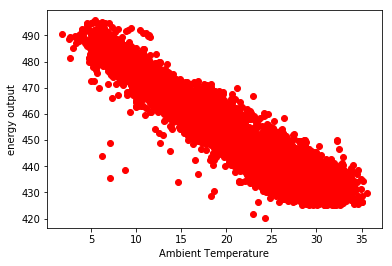

In [8]:
# Plot outputs Ambient Temperature vs energy output
plt.scatter(X_trn[:,0], y_trn,  color='red')
plt.xlabel('Ambient Temperature')
plt.ylabel('energy output')
plt.show()

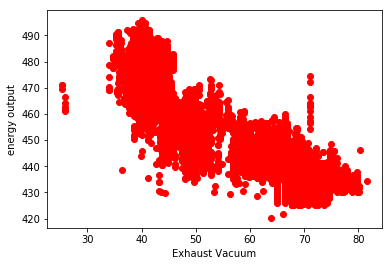

In [9]:
# Plot outputs Exhaust Vacuum vs energy output
plt.scatter(X_trn[:,1], y_trn,  color='red')
plt.xlabel('Exhaust Vacuum')
plt.ylabel('energy output')
plt.show()

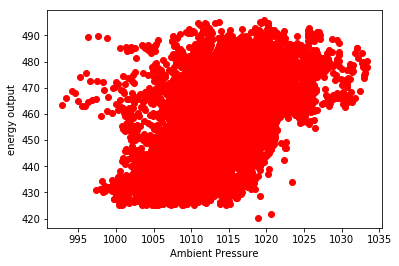

In [10]:
# Plot outputs Ambient Pressure (AP) vs energy output
plt.scatter(X_trn[:,2], y_trn,  color='red')
plt.xlabel('Ambient Pressure')
plt.ylabel('energy output')
plt.show()

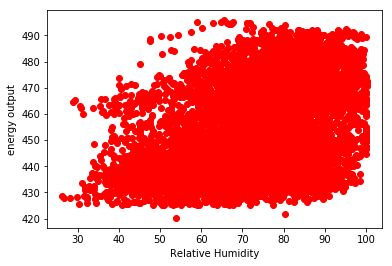

In [11]:
# Plot outputs Relative Humidity vs energy output
plt.scatter(X_trn[:,3], y_trn,  color='red')
plt.xlabel('Relative Humidity')
plt.ylabel('energy output')
plt.show()

In [12]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [13]:
# Train the model using the training sets
regr.fit(X_trn, y_trn)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
# Make predictions using the testing set
y_pred = regr.predict(X_tst)

In [15]:
# The coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [-1.98589969 -0.23209358  0.06219991 -0.15811779]


In [16]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_tst, y_pred))

Mean squared error: 20.27


In [17]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_tst, y_pred))

Variance score: 0.93


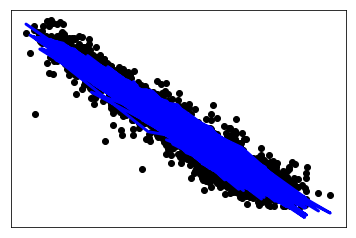

In [18]:
# Plot outputs
plt.scatter(X_tst[:,0], y_tst,  color='black')
plt.plot(X_tst[:,0], y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()